<a href="https://colab.research.google.com/github/Rugiyya1/Credit_card_fraud_detection-Kaggle_competition-/blob/main/Credit_card_fraud_detection(Kaggle_competition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [193]:
df = pd.read_csv('/content/train.csv')
df.sample(8)

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
181876,181876,81914.0,-0.467547,0.923982,1.333828,-0.110291,0.143916,0.143641,0.491559,0.230126,...,-0.161770,-0.259979,-0.058824,-0.344679,-0.549934,0.099595,0.403049,0.232671,29.99,0
194247,194247,87613.0,-0.349425,0.848573,0.001614,0.892448,1.455770,0.443066,0.968304,0.097449,...,0.273469,0.977759,-0.362789,-0.303638,0.069675,-0.227738,0.470572,0.227075,2.36,0
16415,16415,24401.0,1.096470,-1.082815,1.452779,-0.061047,-1.813366,0.132335,-1.357900,0.192708,...,-0.029807,0.098474,-0.020717,0.358860,0.205750,-0.250586,0.022088,0.031928,101.54,0
195343,195343,88987.0,-0.103728,0.966385,-0.134524,-0.845669,1.038557,-0.276819,0.946436,-0.141837,...,-0.342439,-0.724781,-0.049901,-1.056800,-0.339533,0.138800,0.247970,0.125816,4.47,0
92954,92954,58790.0,-1.280782,-0.406589,1.336460,-0.984467,1.965779,3.731008,-0.425799,1.098654,...,0.074566,-0.092302,0.077579,1.045682,-0.156677,0.389522,0.047557,0.014829,60.99,0
161504,161504,76681.0,1.415568,-1.192950,0.639676,-1.295834,-1.570803,-0.404512,-1.175598,-0.030666,...,-0.165748,-0.079283,0.049336,0.063140,0.270079,-0.170857,0.051459,0.025818,34.00,0
10519,10519,11041.0,-0.459838,1.058477,1.601765,0.351457,-0.193912,-0.483378,0.427848,-0.105598,...,0.115514,0.619899,-0.099553,0.490975,-0.336090,0.962999,0.331733,0.242959,15.95,0
38002,38002,39703.0,1.352908,0.097817,-0.208098,-0.069687,-0.048153,-0.764645,0.085701,-0.261616,...,-0.112761,-0.270983,-0.130839,-0.383055,0.544643,1.099426,-0.087936,-0.001751,0.00,0


In [238]:
## test dataset

df_test =pd.read_csv('/content/test.csv')
df_test.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,219129,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,...,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
1,219130,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,...,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
2,219131,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,...,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
3,219132,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,...,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
4,219133,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,...,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98


In [14]:
df.tail()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
219124,219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,...,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0
219125,219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,...,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0
219126,219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,...,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0
219127,219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,...,0.109909,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0
219128,219128,120580.0,-0.431758,1.299171,-0.571602,-1.161499,1.141765,-1.258871,1.701553,-0.454580,...,0.225629,0.988442,-0.224609,0.082977,-0.335529,0.042237,0.304965,0.240049,3.78,0


# EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,219129.0,109564.000000,63257.237906,0.000000,54782.000000,109564.000000,164346.000000,219128.000000
Time,219129.0,62377.415376,25620.348569,0.000000,47933.000000,63189.000000,77519.000000,120580.000000
V1,219129.0,0.096008,1.395425,-29.807725,-0.846135,0.385913,1.190661,2.430494
V2,219129.0,0.048345,1.159805,-44.247914,-0.573728,0.046937,0.814145,16.068473
V3,219129.0,0.592102,1.132884,-19.722872,-0.027154,0.735895,1.306110,6.145578
V4,219129.0,0.069273,1.253125,-5.263650,-0.769256,0.064856,0.919353,12.547997
V5,219129.0,-0.161555,1.069530,-37.591259,-0.847346,-0.229929,0.356856,34.581260
V6,219129.0,0.133688,1.202411,-25.659750,-0.631835,-0.087778,0.482388,16.233967
V7,219129.0,-0.128224,0.817207,-31.179799,-0.646730,-0.098970,0.385567,39.824099
V8,219129.0,0.149534,0.716212,-28.903442,-0.095948,0.111219,0.390976,18.270586


- All features are numerical
- V1 - V28 are PCA obtained components, only 'time' and 'amount' have not been transformed with PCA
- 'time' indicates seconds elapsed between transaction and first transaction
- 'amount' is the transaction amount
- 'class'  - 1 is fraud

In [81]:
# target inspection

df.Class.value_counts()

0    218660
1       469
Name: Class, dtype: int64

In [19]:
#as visible from dataset is highly imbalanced

In [76]:
## Histogram of numerical features:

def numerical_feature_hist(data):

  num_col = data.select_dtypes(include='number').columns # selecting numerical columns

  fig = plt.figure(figsize=(18, 50))
  rows, cols = 10, 3

  for idx, col in enumerate(num_col):
    ax = fig.add_subplot(rows, cols, idx+1)
    sns.histplot(data=data, x= col, alpha=0.5)
    ax.set_xlabel(col)
    fig.show()

  plt.show()

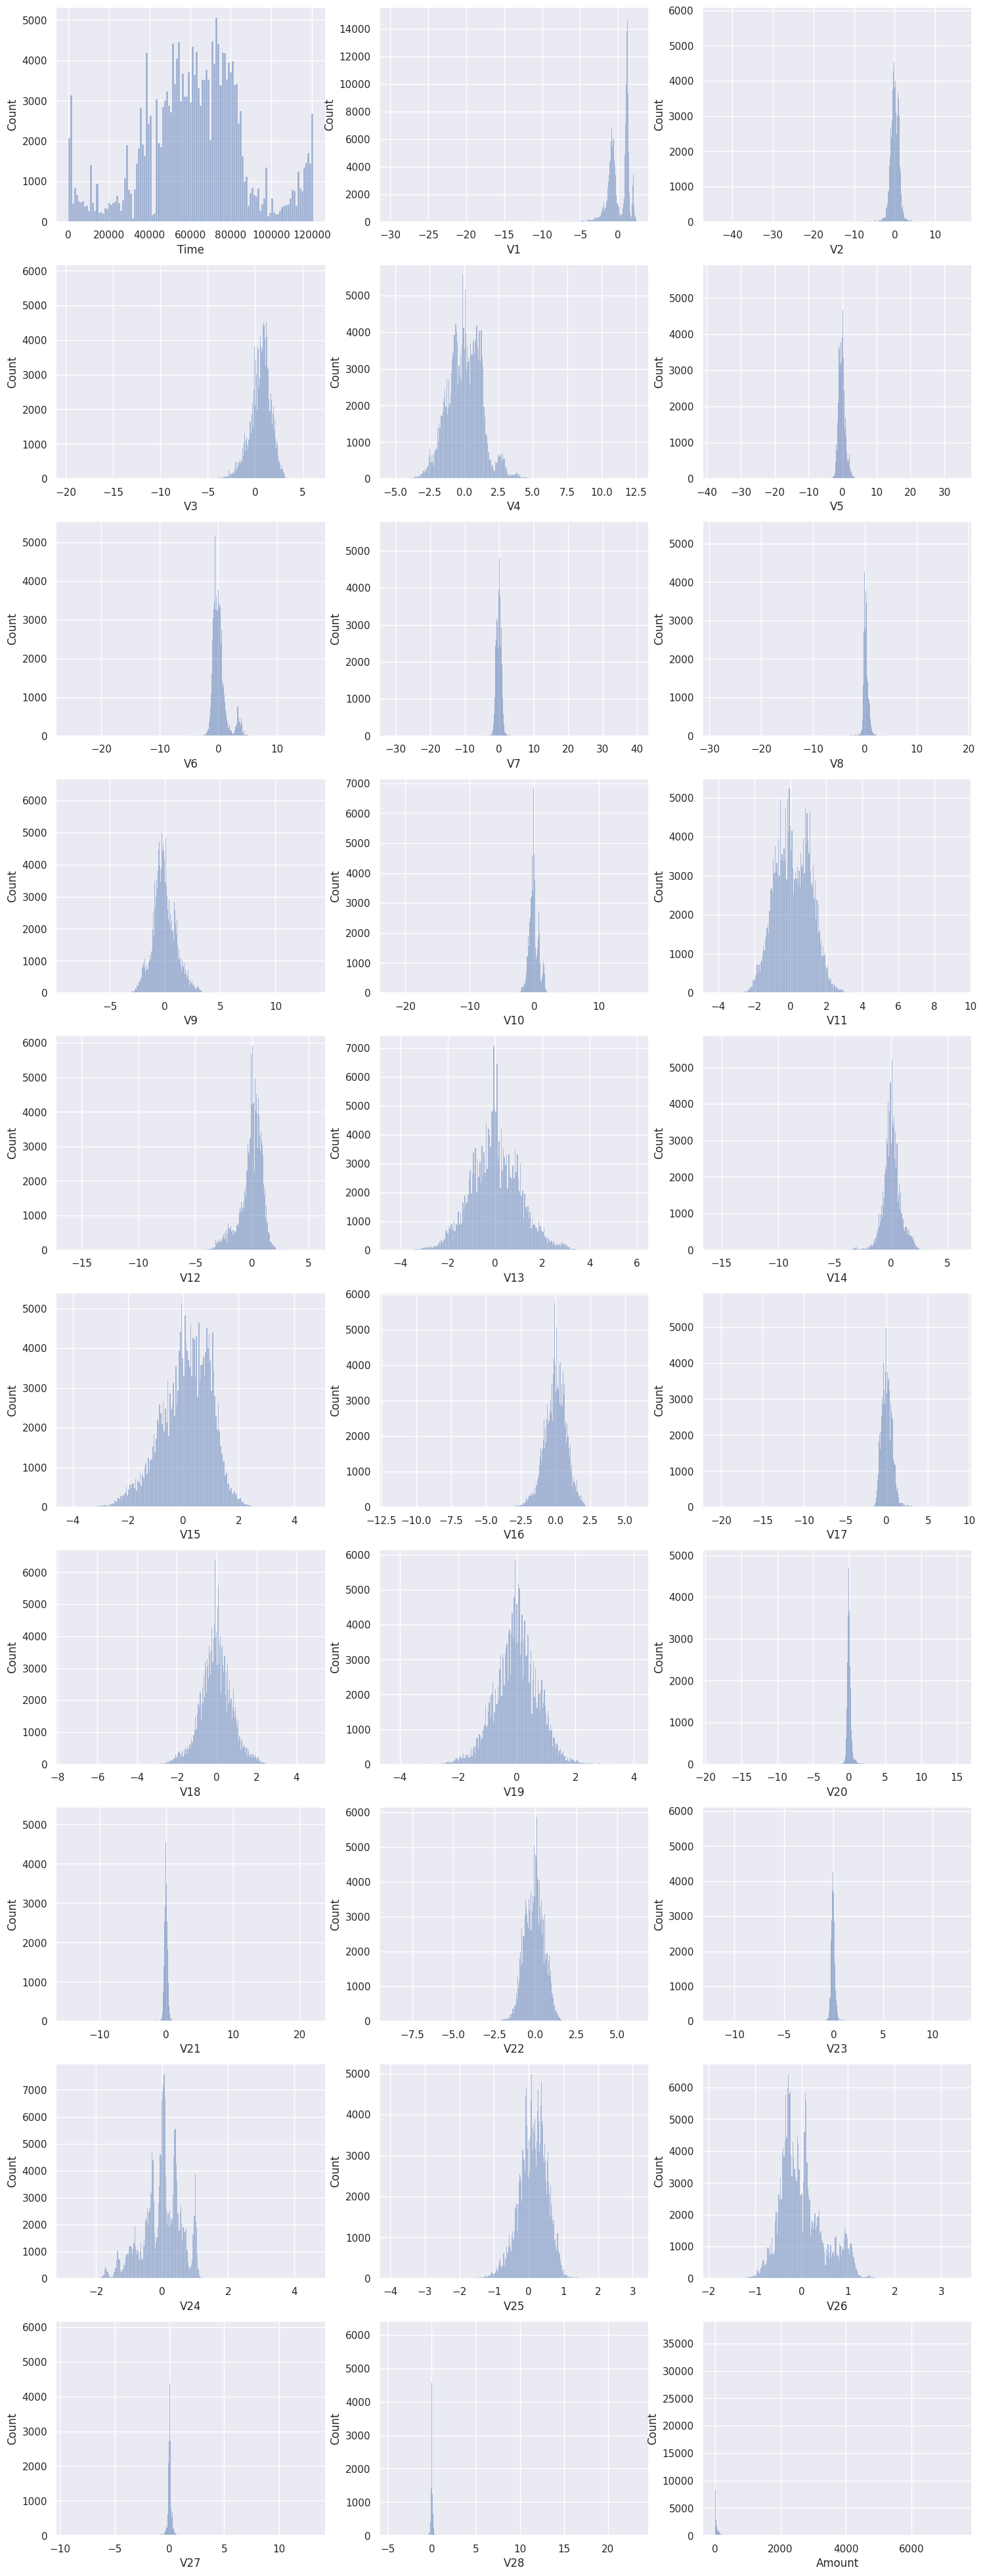

In [77]:
numerical_feature_hist(df.loc[:, 'Time':'Amount'])

In [6]:
## proceeding first without treating outliers

df_wo = df.copy() ## Wo with outliers

<Axes: >

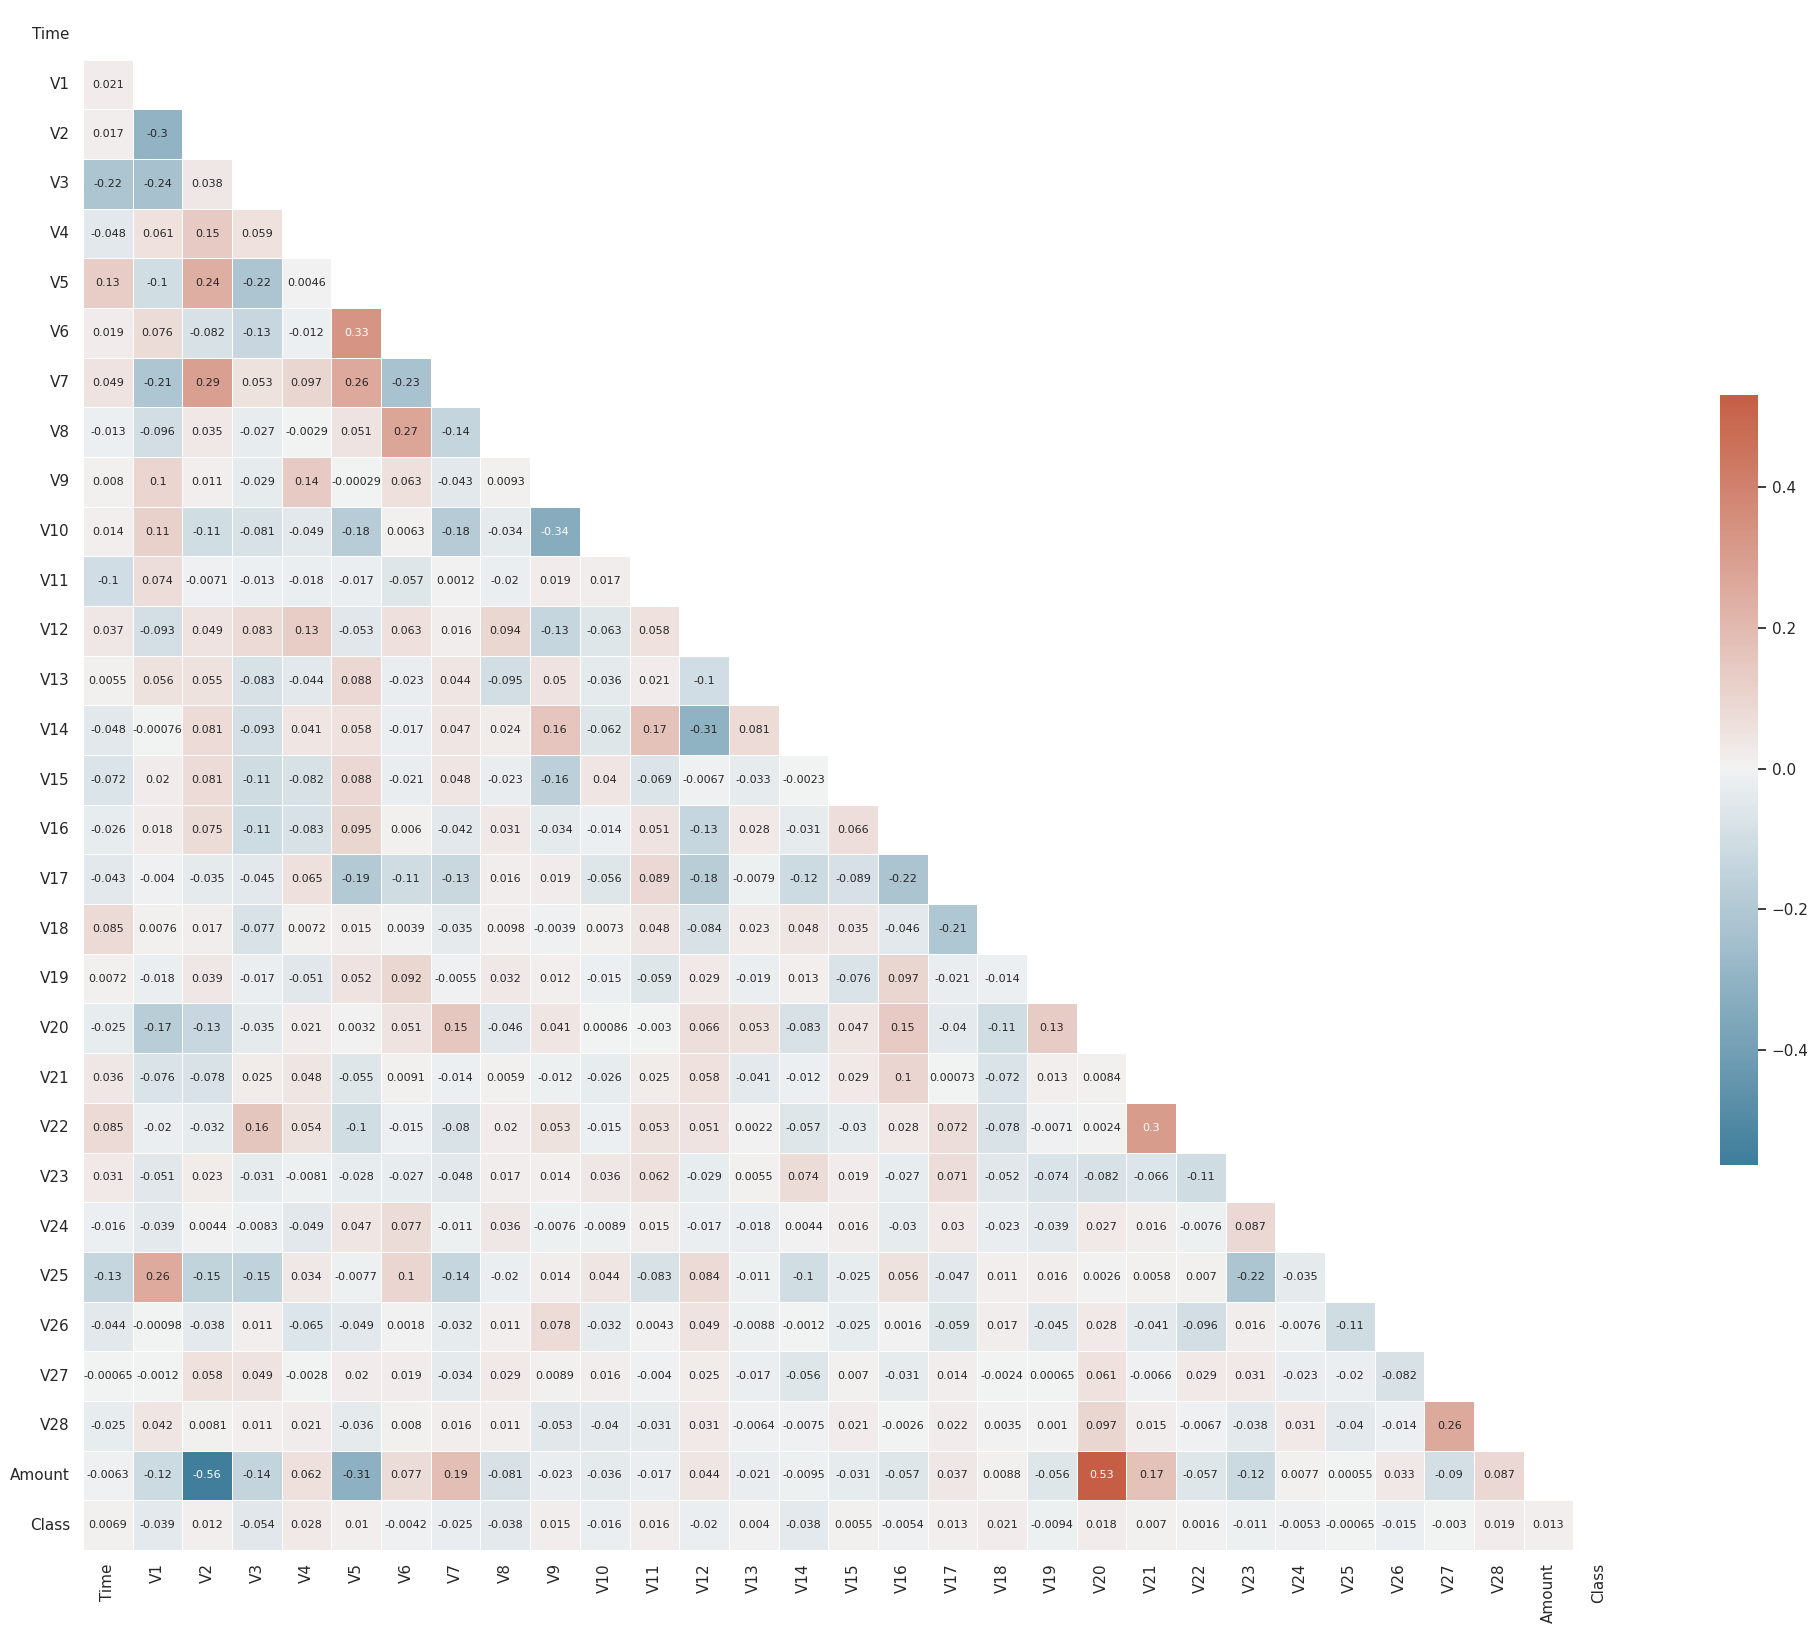

In [87]:
## Checking correlation between variables

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_wo.corr()

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))

# Generate a custom diverging colormap (choose colors here)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})

In [89]:
correlation = df_wo.corr()
correlation['Class'].sort_values(ascending=True)

V3       -0.054008
V1       -0.039251
V14      -0.038398
V8       -0.037774
V7       -0.024589
V12      -0.020393
V10      -0.016393
V26      -0.015361
V23      -0.010955
V19      -0.009408
V16      -0.005357
V24      -0.005328
V6       -0.004217
V27      -0.003014
V25      -0.000648
V22       0.001579
V13       0.004011
V15       0.005546
Time      0.006889
V21       0.006951
V5        0.010144
V2        0.012451
Amount    0.012909
V17       0.013010
V9        0.015108
V11       0.016485
V20       0.018148
V28       0.019134
V18       0.021058
V4        0.027977
Class     1.000000
Name: Class, dtype: float64

In [90]:
# as visible from above results that correlation between target and features are very low. Lets proceed with our models like this

In [191]:
## data prepration

from sklearn.model_selection import train_test_split

X = df_wo.drop('Class', axis=1)
y = df_wo['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, stratify =y)

In [138]:
y_train.value_counts()


0    153062
1       328
Name: Class, dtype: int64

In [139]:
y_test.value_counts()

0    65598
1      141
Name: Class, dtype: int64

# Modelling and evaluation

In [41]:
# algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import roc_auc_score, RocCurveDisplay

In [147]:
scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)

In [148]:
X_test = scaler.transform(X_test)

In [149]:
lr_model = LogisticRegression()
lr_scores = cross_val_score(lr_model,X_train, y_train, cv=5, scoring='accuracy')
print(lr_scores)

[0.99778343 0.99788122 0.99775083 0.99781602 0.99771823]


In [150]:
log_clf =LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42, ccp_alpha =0.001)

In [151]:
log_clf.fit(X_train, y_train)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.001, max_leaf_nodes=16, n_estimators=500,
                       n_jobs=-1, random_state=42)

In [152]:
y_pred_rf = rnd_clf.predict(X_test)
y_pred_log = log_clf.predict(X_test)

In [153]:
print('Random Forest model ROC-AUC score: ', roc_auc_score(y_test, y_pred_rf))

Random Forest model ROC-AUC score:  0.5


In [154]:
print('Logistric Regression model ROC-AUC score: ', roc_auc_score(y_test, y_pred_log))

Logistric Regression model ROC-AUC score:  0.514153908428708


## Modelling after treating outliers & imbalance

In [195]:
## Lets remove 'Id' column as  there is no value

df.drop('id', axis=1, inplace=True)

In [196]:
## filtering out class 1 values and Time column, then will be combined with processed data

#class_1 rows

df_1 = df[df['Class']==1]
df_1.shape

(469, 31)

In [197]:
df_0 = df[df['Class']==0]
df_0.shape

(218660, 31)

In [198]:
## data prepration

from sklearn.model_selection import train_test_split

X_0 = df_0.drop('Class', axis=1)
X_1 = df_1.drop('Class', axis=1)

## Removing Time column
X_0_wt = X_0.drop('Time', axis=1)


In [199]:
import scipy.stats

def z_score_removal(df, threshold=1.96, replace_with = None):

  df_copy = df.copy()

  for column in df_copy.columns:
    array = df[column]

    z_scores = scipy.stats.zscore(array)
    outliers=(z_scores > threshold) | (z_scores < -threshold)

    if replace_with is not None:
      df_copy[column][outliers]=replace_with

    else:
      df_copy=df_copy[~outliers]

  return df_copy[~outliers]


In [200]:
X_treated =z_score_removal(X_0_wt)

<ipython-input-199-64e14d30d385>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy=df_copy[~outliers]
<ipython-input-199-64e14d30d385>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df_copy[~outliers]


In [201]:
X_treated.shape

(88928, 29)

In [202]:
## combining with Time column
idx =X_treated.index
X_comb = X_0.loc[idx, :]
X_comb.shape

(88928, 30)

In [203]:
## combining with Class 1 rows
X_final = pd.concat([X_comb, X_1], ignore_index=False)
X_final

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00
5,0.0,1.052469,0.099592,1.077244,1.370024,-0.471625,0.238658,-0.281837,0.055925,0.425970,...,0.002408,-0.013418,0.210670,-0.031069,0.131544,0.452867,-0.376528,0.086428,0.049083,35.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218320,120164.0,2.169813,-0.045807,-2.079652,0.207907,0.722241,-0.966274,0.564011,-0.381757,0.403626,...,-0.286788,0.054715,0.235221,-0.041338,0.084528,0.363729,0.749486,-0.136626,-0.082399,6.99
218396,120185.0,-11.419870,-39.517039,-15.773813,3.756988,-1.482355,-3.490795,-3.917593,0.865307,-3.497517,...,8.387595,1.818999,0.936693,-0.072615,-0.664149,-0.494026,0.867453,-2.758080,0.185558,498.25
218404,120188.0,1.708900,-1.003900,-1.531147,-0.173086,-0.430068,-0.367895,-0.073634,-0.231775,-0.067886,...,-0.227253,-0.099366,0.061036,-0.078629,0.009812,0.057939,-0.466157,0.049888,0.001680,229.99
218937,120550.0,-1.330035,1.912497,0.058653,4.098485,0.555525,1.281339,-0.332319,1.016770,-1.751660,...,0.171426,-0.380175,-1.235965,0.287937,-0.391235,-0.871630,0.080706,0.179565,-0.092588,20.00


In [204]:
## getting index for target variable
idx2 = X_final.index
y = df['Class']
y_final = y[idx2]
y_final.shape

(89397,)

In [205]:
X_final.reset_index(drop=True)
y_final.reset_index(drop=True)

0        0
1        0
2        0
3        0
4        0
        ..
89392    1
89393    1
89394    1
89395    1
89396    1
Name: Class, Length: 89397, dtype: int64

In [206]:
y_final.value_counts(normalize=True).map("{:.2%}".format).to_frame()

,Class
0,99.48%
1,0.52%


In [207]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size =0.2, stratify =y_final)

In [208]:
## Using SMOTE techniqe to treat imbalance data
from imblearn.over_sampling import SMOTE

smote= SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [209]:
scaler = StandardScaler()

X_smote= pd.DataFrame(scaler.fit_transform(X_smote), columns=X_smote.columns)

X_smote.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.141263,0.674707,-0.452604,0.323896,-1.315063,-0.749030,-0.037383,-0.117483,0.188222,1.366023,...,0.084457,-0.172693,-0.363944,0.029766,0.267228,0.440066,0.028261,-0.017356,-0.035269,0.272523
1,0.329749,0.651845,-0.414960,0.246760,-0.020714,-0.589652,0.332068,-0.048699,0.141577,-1.045828,...,-0.306568,-0.242221,-0.368936,0.018727,0.057431,0.339808,-0.649692,0.072376,-0.002290,0.540278
2,0.006204,-0.064060,-0.111169,0.975412,-1.893437,-0.427148,0.089129,0.079841,0.262291,-0.543789,...,0.150554,-0.201653,-0.415164,-0.239261,0.000084,0.350211,-0.502715,0.767708,0.165149,-0.273536
3,0.374216,0.025743,0.307979,0.596216,-0.458462,0.295435,-0.464361,0.703217,0.070926,-0.626576,...,0.225130,-0.374736,-1.133998,0.101880,0.055658,-0.589132,0.503198,0.524876,0.085188,-0.278610
4,0.326451,-0.056944,0.337031,0.303111,0.347804,0.352452,-0.053399,0.545272,0.303851,-0.591221,...,0.004015,0.156752,0.690603,-0.100696,-0.477258,-0.643622,-0.548849,0.638506,0.084503,-0.222145


In [210]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.942227,1.193209,-0.877823,-0.028485,-1.466143,-1.560596,-0.351372,-0.794532,0.143023,-0.563115,...,-0.374319,0.090439,0.990128,0.450714,-0.083375,-1.788293,-0.372718,0.032950,-0.102875,0.188329
1,2.178668,-0.150105,0.059611,1.068614,-1.381910,0.334815,0.412304,0.581193,0.122496,0.062199,...,0.031915,-0.131820,-0.035719,-0.513826,0.309375,0.489254,1.012902,-0.392761,-0.347546,-0.258516
2,0.790508,-0.120134,0.236390,0.780328,-0.489176,0.270305,-0.164471,0.697481,0.086214,-0.287214,...,-0.201553,-0.354312,-1.362573,-0.142864,-0.168462,0.146122,0.954961,-0.448175,0.013841,-0.313825
3,0.763606,-0.177106,0.263727,0.654362,0.499709,-0.009481,0.208572,0.261913,0.488160,-0.590421,...,-0.151608,0.262708,1.103381,0.090689,0.517862,-1.224705,-0.679711,0.646881,0.202132,-0.299960
4,0.803662,-0.202514,0.288011,0.684360,0.542225,0.115372,0.121311,0.438768,0.418513,-0.789866,...,0.181939,-0.071255,0.149056,0.059588,0.552991,-0.200464,-0.778119,0.635533,0.151940,-0.183363


In [168]:
log_clf =LogisticRegression(random_state=42)

In [169]:
log_clf.fit(X_smote, y_smote)

LogisticRegression(random_state=42)

In [170]:
y_pred_log = log_clf.predict(X_test)

In [171]:
print('Logistric Regression model ROC-AUC score: ', roc_auc_score(y_test, y_pred_log))

Logistric Regression model ROC-AUC score:  0.5


In [147]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42, ccp_alpha =0.001)

In [148]:
rnd_clf.fit(X_smote, y_smote)

RandomForestClassifier(ccp_alpha=0.001, max_leaf_nodes=16, n_estimators=500,
                       n_jobs=-1, random_state=42)

In [152]:
y_pred_rf = rnd_clf.predict(X_test)

In [153]:
print('Random Forest model ROC-AUC score: ', roc_auc_score(y_test, y_pred_rf))

Random Forest model ROC-AUC score:  0.7763218022302982


In [211]:
from lightgbm.sklearn import LGBMClassifier

lgbm_clf =LGBMClassifier(random_state=42)

In [212]:
lgbm_clf.fit(X_smote, y_smote)

[LightGBM] [Info] Number of positive: 71142, number of negative: 71142
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 142284, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=42)

In [213]:
y_pred_lgbm = lgbm_clf.predict(X_test)

In [214]:
print('RLGBM model ROC-AUC score: ', roc_auc_score(y_test, y_pred_lgbm))

RLGBM model ROC-AUC score:  0.874314246682186


In [97]:
## Voting Classiffier

log_clf =LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
lgbm_clf =LGBMClassifier(random_state=42)

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators =[('lr', log_clf), ('rf', rnd_clf), ('lgbm', lgbm_clf)],
    voting='hard')

In [98]:
voting_clf.fit(X_smote, y_smote)

[LightGBM] [Info] Number of positive: 71142, number of negative: 71142
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043721 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 142284, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('lgbm', LGBMClassifier(random_state=42))])

In [100]:
y_pred_vot= voting_clf.predict(X_test)

In [101]:
print('Voting classifier ROC-AUC score: {} ', roc_auc_score(y_test, y_pred_vot))

Voting classifier ROC-AUC score: {}  0.8160566163681213


# Final model

In [215]:
def test_data_prep(test_df):

  ## drop id column
  test = test_df.drop('id', axis=1)

  #Scaling test data
  X_final=pd.DataFrame(scaler.transform(test), columns=test.columns)

  return X_final


In [230]:
test = test_data_prep(df_test)

test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,2.279443,1.202333,-0.387967,-0.666146,-0.951339,-0.409891,-0.587883,-0.394810,0.064390,-0.221350,...,0.033194,0.351141,1.186798,0.205079,-1.027660,-0.649627,0.035289,-0.038885,-0.122395,-0.173316
1,2.279443,1.029032,-0.756513,-0.281299,-1.245642,-0.450758,2.256182,-0.853704,0.827277,0.922760,...,0.499213,0.808325,2.230442,0.610747,7.562279,-0.935590,0.445035,-0.043702,0.028353,0.497578
2,2.279443,1.244284,-0.715554,-0.124735,-1.717053,-1.167198,0.038595,-0.885570,0.153888,-1.056522,...,-0.507319,-0.214689,0.170686,0.583631,1.570967,-1.654364,-0.532722,0.050895,-0.150082,-0.243395
3,2.279443,1.143730,-0.492652,-0.987345,-1.542734,-0.054547,-0.613702,0.367524,-0.197725,1.813875,...,-0.111811,-0.136747,0.004680,0.091158,1.404742,0.466540,-1.412298,-0.105815,-0.147102,0.283977
4,2.279443,-0.688666,-0.751795,0.181145,-1.180188,2.081395,-1.710912,0.229466,0.046395,-0.266843,...,0.436780,0.111127,-0.500368,0.518620,-0.714317,-2.247013,0.193169,0.712083,0.499643,-0.313825


In [231]:
df_test.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,219129,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,...,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
1,219130,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,...,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
2,219131,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,...,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
3,219132,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,...,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
4,219133,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,...,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98


In [222]:
y_col = lgbm_clf.predict_proba(test)[:,1]

In [240]:
df_test['prediction'] = y_col

#setting index to id column
df_test=df_test.set_index('id')

In [241]:
df_test['prediction']

id
219129    0.593869
219130    0.641929
219131    0.075800
219132    0.971360
219133    0.634406
            ...   
365211    0.141368
365212    0.055733
365213    0.350720
365214    0.635638
365215    0.987742
Name: prediction, Length: 146087, dtype: float64

In [242]:
df_test['prediction'].to_csv('submission_csv')